In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ClassFiles.Denoiser import Denoiser
import mrcfile
from ClassFiles.ut import locate_gt, unify_form
saves_path = '/local/scratch/public/sl767/SPA/Saves/Denoiser/Final_EM_trained'
denoiser = Denoiser(saves_path, load=True)
pdb_id = '5A0M'

INFO:tensorflow:Summary name Ground Truth is illegal; using Ground_Truth instead.
INFO:tensorflow:Summary name Ground Truth is illegal; using Ground_Truth instead.
INFO:tensorflow:Restoring parameters from /local/scratch/public/sl767/SPA/Saves/Denoiser/Final_EM_trained/Data/model-31000
Save restored


In [2]:
def vis(data):
    #plt.imshow(im[...,45])
#     plt.imshow(np.mean(data.squeeze(), axis=-1))
#     plt.imshow(data.squeeze().mean(axis=-1))
    plt.imshow(np.maximum(0,data.squeeze()[...,45]))

In [3]:
with mrcfile.open(locate_gt(pdb_id, full_path=False)) as mrc:
    gt = mrc.data.copy()
gt = unify_form(gt)
gt /= np.sum(np.abs(gt))

In [4]:
path_em = '/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/5A0M/5A0M_mult002_class001.mrc'
path_AR = '/local/scratch/public/sl767/MRC_Data/Data_002_10k/TestAR/5A0M/5A0M_mult002_it013_half2_class001_external_reconstruct.mrc'
with mrcfile.open(path_em) as mrc:
    em_final = mrc.data.copy()
em_final = em_final[None,...,None]
den = denoiser.evaluate(em_final)

path_den = '/local/scratch/public/sl767/MRC_Data/Data_002_10k/misc/Denoiser/5A0M/5A0M_denoised.mrc'

with mrcfile.new(path_den, overwrite=True) as mrc:
     mrc.set_data(den.copy().squeeze())
     mrc.voxel_size = 1.5

with mrcfile.open(path_AR) as mrc:
    ar = mrc.data.copy()

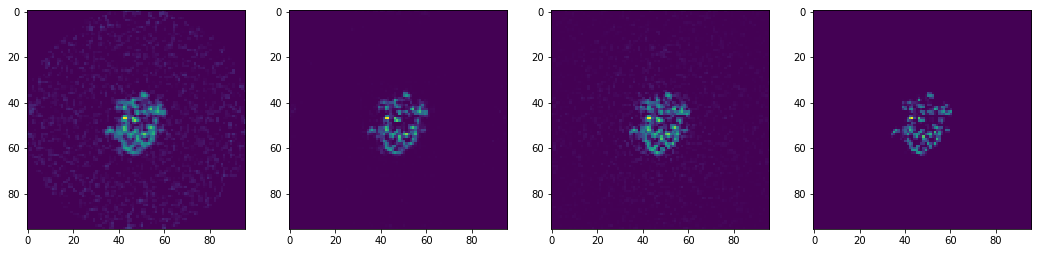

In [5]:
plt.figure(figsize=(18,5))
plt.subplot(141)
vis(em_final)
#plt.colorbar()
plt.subplot(142)
vis(den)
#plt.colorbar()
plt.subplot(143)
vis(ar)
#plt.colorbar()
plt.subplot(144)
vis(gt)
#plt.colorbar()